In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as Math


In [17]:
regions = ['africa','europe','north_america_australia','west_asia']
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],'europe':['Denmark','UK','Finland'],'north_america_australia':['Australia','Canada','USA'],'west_asia':['Malaysia','Philippines','Singapore']}
clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']
topic = clusters[2] # 0 1 2 3 4 5 6
region = regions[2] # 0 1 2 3 
country = countries[region][2] # 0 1 2 
# total_days_number = 160


In [18]:
#--------general labels with relative traffic rate--------#
# path = f'./output/regions/europe/genral_labeled_data_with_relative_traffic_rates/{country}_with_relative_traffic_rates.csv'
path = f'./output/regions/{region}/genral_labeled_data_with_relative_traffic_rates/{topic}/real_data/{country}_with_relative_traffic_rates.csv'

data = pd.read_csv(path)

df = data[['date','general_label','traffic_rate']]

df


,date,general_label,traffic_rate
0,2016-11-28,Entertainment,0.1
1,2016-11-29,Entertainment,0.1
2,2016-11-30,Entertainment,0.1
3,2016-12-01,Entertainment,0.1
4,2016-12-02,Entertainment,0.1
...,...,...,...
153,2017-04-30,Entertainment,0.1
154,2017-05-01,Entertainment,0.1
155,2017-05-02,Entertainment,0.1
156,2017-05-03,Entertainment,0.1


north_america_australia USA Entertainment
empty_days:  3


C:\Users\alkrd\AppData\Local\Temp\ipykernel_9024\524739842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


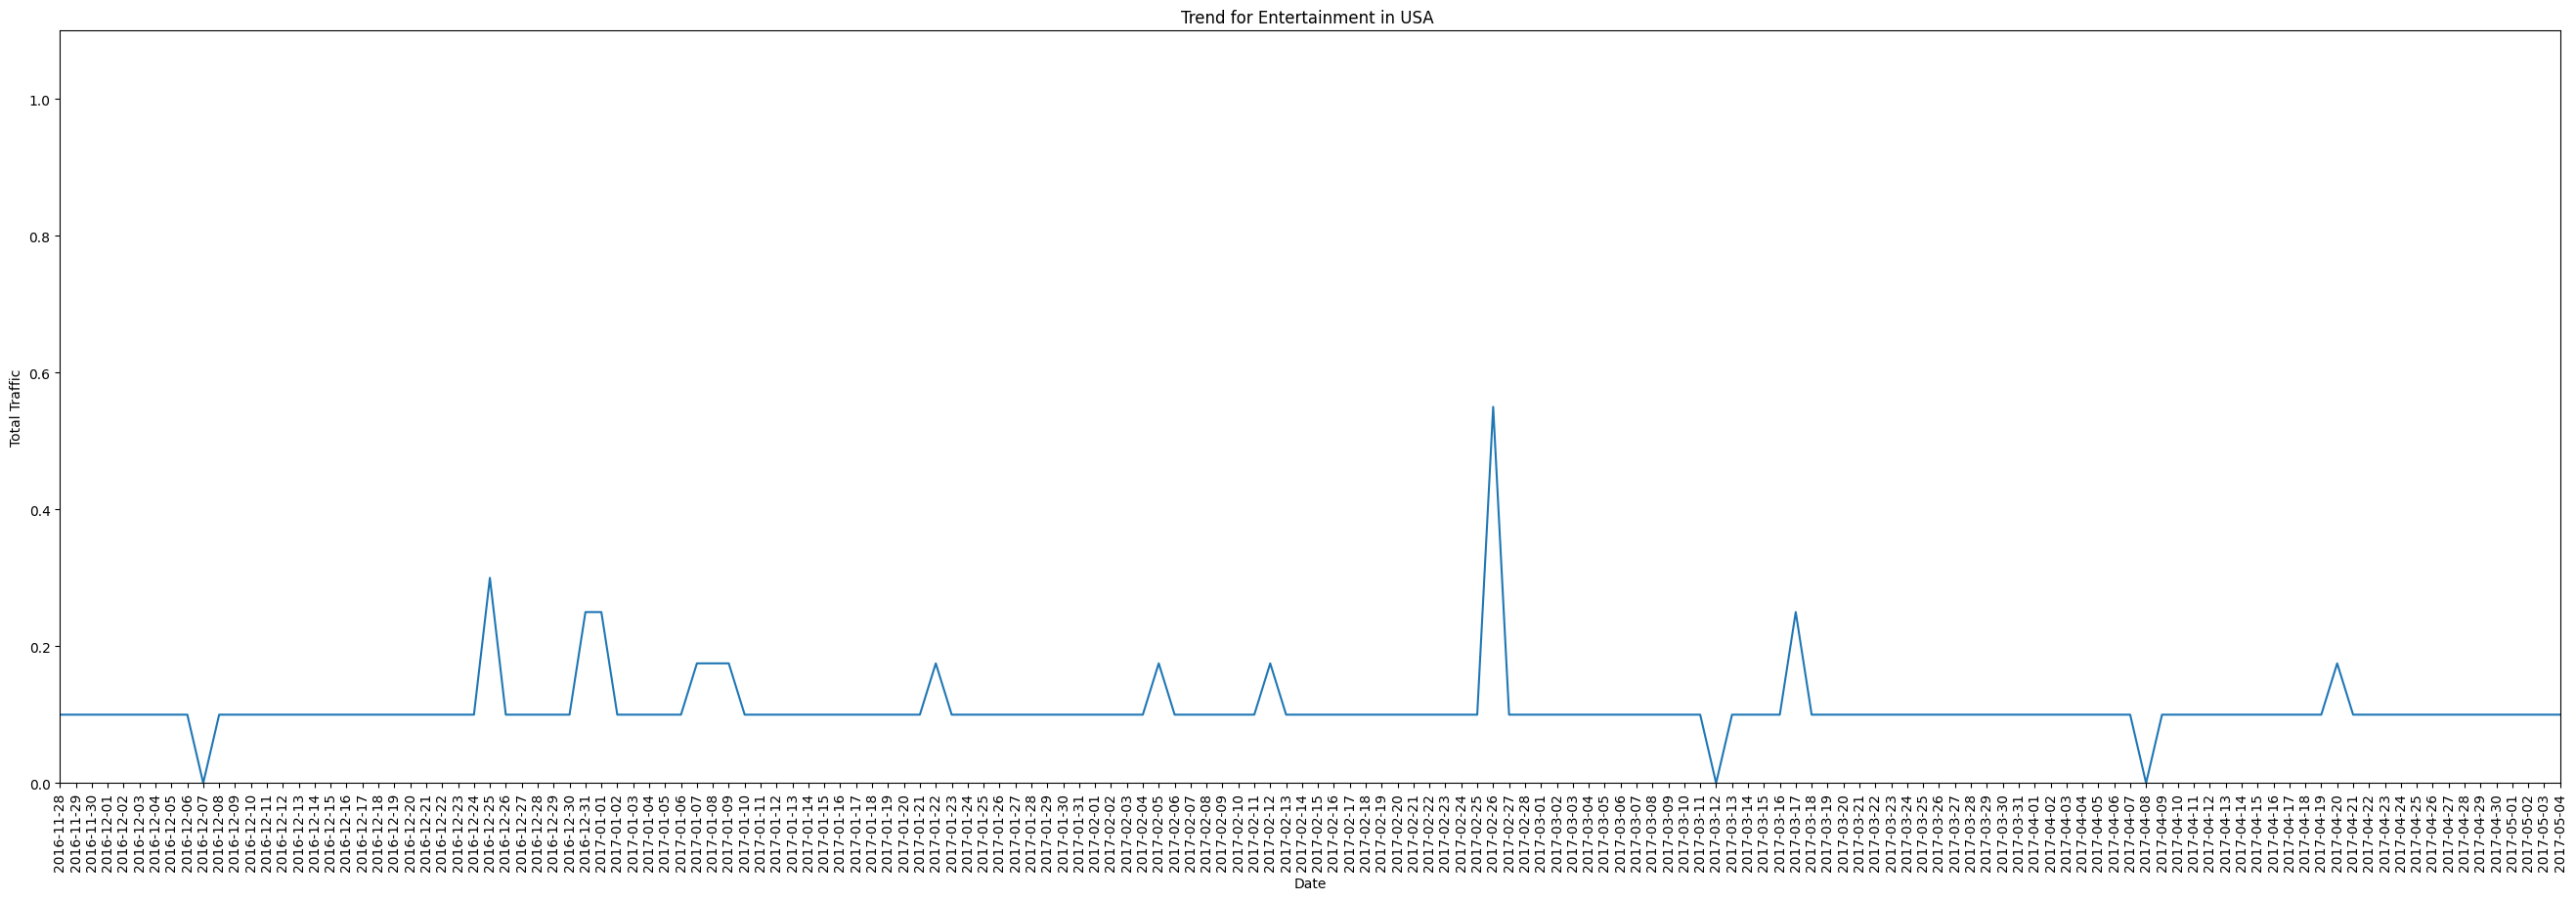

In [19]:
print(region, country, topic)
empty_days = df[df['traffic_rate'] == 0.0].count()

print("empty_days: ", int(empty_days['traffic_rate']))

df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(33, 10))
sns.lineplot(data=df, x='date', y='traffic_rate')
plt.title(f"Trend for {df['general_label'][0]} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(df['date'], rotation=90)

plt.ylim(0, 1.1)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()

In [20]:
# def calculate_empty_days_mean(regions, clusters):
#     for region in regions:
#         for cluster in clusters:
#             empty_days = 0
#             for country in countries[region]:
#                 path = f'./output/regions/{region}/genral_labeled_data_with_relative_traffic_rates/{cluster}/{country}_with_relative_traffic_rates.csv'
#                 data = pd.read_csv(path)
#                 df = data[['date', 'general_label', 'traffic_rate']]
#                 empty_days += df[df['traffic_rate'] == 0.0]['traffic_rate'].count()
#             print(cluster, "'s empty days in", region, ":", Math.floor(empty_days / 3))
#         print("--------------------")

# calculate_empty_days_mean(countries.keys(), clusters)